In [1]:
title = "All-Reduce Sum (BFloat16)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'NCCL'
Y2_label = 'TK'

X = [r'$4096^2$', r'$8192^2$', r'$16384^2$', r'$32768^2$', r'$65536^2$', r'$131072^2$']
Y1 = [0.17, 0.4, 1.33, 4.6, 17.93, 71.37]
Y2 = [0.1, 0.3, 1.13, 4.42, 17.57, 70.25]

logscale = True
Y_unit = 'ms'

In [2]:
title = "All-Gather (BFloat16, Tensor Dimension)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'NCCL'
Y2_label = 'TK'

X = [r'$4096^2$', r'$8192^2$', r'$16384^2$', r'$32768^2$', r'$65536^2$', r'$131072^2$']
Y1 = [0.16, 0.52, 2.02, 7.80, 30.75, 126.98]
Y2 = [0.07, 0.21, 0.79, 3.01, 11.98, 47.79]

logscale = True
Y_unit = 'ms'

In [ ]:
title = "Reduce-Scatter (BFloat16, Tensor Dimension)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'NCCL'
Y2_label = 'TK'

X = [r'$4096^2$', r'$8192^2$', r'$16384^2$', r'$32768^2$', r'$65536^2$', r'$131072^2$']
Y1 = [0.174, 0.519, 2.021, 7.722, 30.492, 126.436]
Y2 = [0.068, 0.210, 0.760, 2.975, 11.789, 47.071]

logscale = True
Y_unit = 'ms'

In [17]:
title = "All-to-All (BFloat16, Scatter=2, Gather=1, H=128, D=128)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'NCCL'
Y2_label = 'TK'

X = [r'$16384^2$', r'$32768^2$', r'$65536^2$', r'$131072^2$', r'$262144^2$', r'$524288^2$']
Y1 = [0.244, 0.443, 0.838, 1.631, 3.106, 6.226]
Y2 = [0.109, 0.192, 0.361, 0.694, 1.362, 2.698]

logscale = True
Y_unit = 'ms'

In [ ]:
title = "Ulysses Sequence-Parallel Attention With FA4 (BFloat16, H=128, D=128)"

X_label = 'Sequence Length'
Y_label = 'TFLOP/s'
Y1_label = 'NCCL + FA4'
Y2_label = 'TK + FA4'

X = [16384, 32768, 65536, 131072, 262144, 524288, ]
Y1 = [617.39, 882.57, 1055.31, 1120.69, 1237.34, 1309.09]
Y2 = [870.73, 1097.83, 1162.23, 1196.00, 1287.36, 1343.78]

logscale = False
Y_unit = ''

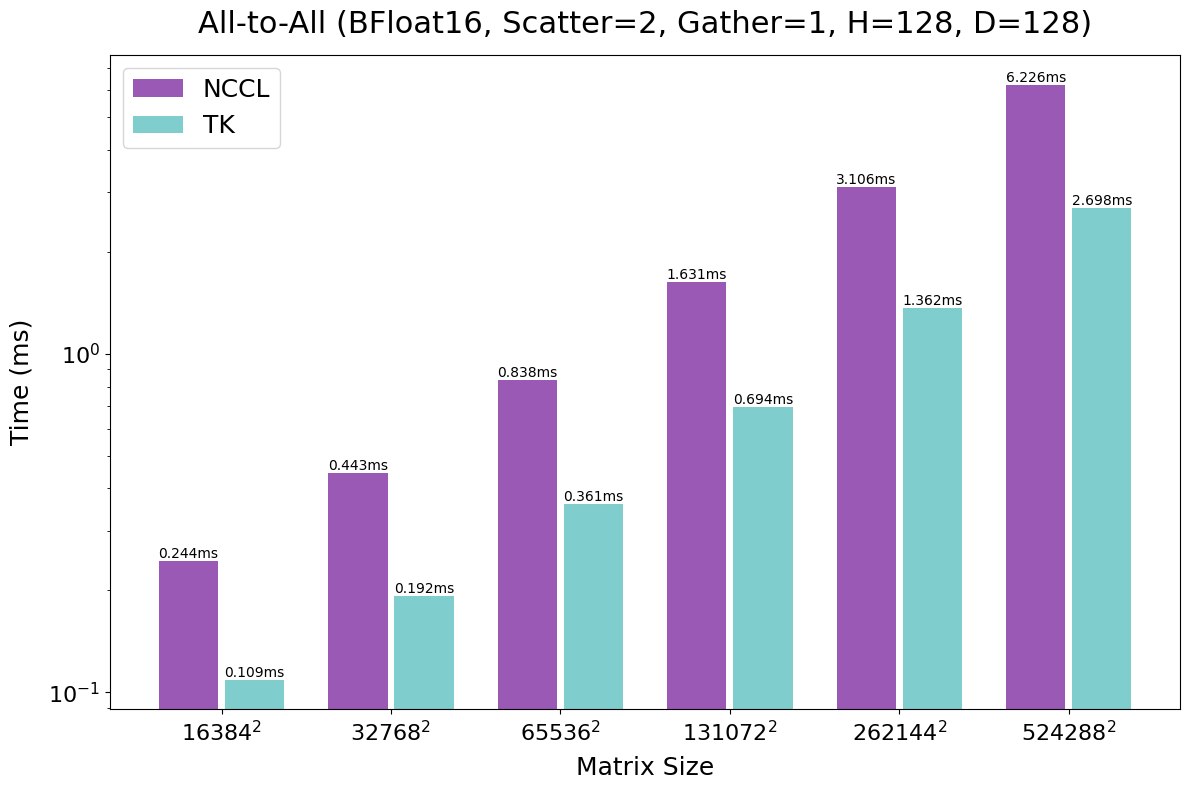

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(len(X))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x_range - width/2 - 0.02, Y1, width, label=Y1_label, color='#9b59b6')
bars2 = ax.bar(x_range + width/2 + 0.02, Y2, width, label=Y2_label, color='#7fcdcd')

ax.set_title(title, fontsize=22, pad=16)
ax.set_ylabel(Y_label, fontsize=18, labelpad=10)
ax.set_xlabel(X_label, fontsize=18, labelpad=8)
ax.set_xticks(x_range)
ax.tick_params(axis='both', labelsize=16, pad=4)
ax.set_xticklabels(X)
if logscale:
    ax.set_yscale("log")
ax.legend(fontsize=18, loc='upper left')

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}{Y_unit}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()